[random forest](#random-forest)

In [1]:
import numpy as np
import pandas as pd

<Managed Device 0>


In [2]:
# '''
import pickle
x = open('C:/Users/Forge-15 1650/Desktop/190003/data analytic/final_train_bkp', 'rb')
final_train = pickle.load(x)


#train data
test = final_train[final_train['target'].isnull()] #seperating the test from the final dataset



#train data
train = final_train[final_train['target'].notnull()]
train



target_cols = ['target', 'ret', 'transactionRevenue_sum', 'fullVisitorId']
print(target_cols)
# ['target', 'ret', 'transactionRevenue_sum', 'fullVisitorId']
target_test = test['transactionRevenue_sum'].astype('float').apply(lambda x: np.log1p(x))
print(target_test.describe())
# '''

#target
target_cols = ['target', 'ret', 'transactionRevenue_sum', 'fullVisitorId']
target_test = test['transactionRevenue_sum'].astype('float').apply(lambda x: np.log1p(x))
print(target_test)
# print("------------------------------------")

# train data 
train_x = train.drop(target_cols, axis = 1)
train_x_id = train['fullVisitorId'].astype('str')
print("-------------train['fullVisitorId'].astype('str')-----------------------")
print(train_x_id.describe())

train_y = train['target']
print("-------------train['target']-----------------------")
print(train_y.describe())
train_ret = train['ret']
print("-------------train['ret']-----------------------")
print(train['ret'].describe())

test_x = test.drop(target_cols, axis = 1)
print("-------------test.drop(target_cols, axis = 1)-----------------------")
print(test_x.describe())

test_x_id = test['fullVisitorId'].astype('str')
print("-------------test_x_id-----------------------")
print(test_x_id.describe())

test_y = target_test
print("------------test_y-----------------------")
print(test_y)

test_ret = test['ret']
print("-------------test_ret----------------------")
print(test_ret)

['target', 'ret', 'transactionRevenue_sum', 'fullVisitorId']
count    296530.000000
mean          0.249740
std           2.099013
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.158408
Name: transactionRevenue_sum, dtype: float64
1344567    0.0
1344568    0.0
1344569    0.0
1344570    0.0
1344571    0.0
          ... 
1641092    0.0
1641093    0.0
1641094    0.0
1641095    0.0
1641096    0.0
Name: transactionRevenue_sum, Length: 296530, dtype: float64
-------------train['fullVisitorId'].astype('str')-----------------------
count                1344567
unique               1323730
top       344658309918574688
freq                       4
Name: fullVisitorId, dtype: object
-------------train['target']-----------------------
count    1.344567e+06
mean     5.285608e-03
std      3.108308e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.465395e+01
Name: target, dtype: float64
---

In [3]:
#correct dtype train
train_x['isMobile'] = train_x['isMobile'].astype('object')
train_x['isTrueDirect'] = train_x['isTrueDirect'].astype('object')

#correct dtype test
test_x['isMobile'] = test_x['isMobile'].astype('object')
test_x['isTrueDirect'] = test_x['isTrueDirect'].astype('object')

#taking cat and numerical columns seperately
cat_cols = [x for x in train_x.columns if train_x[x].dtype == 'object']
num_cols = set(train_x.columns) - set(cat_cols)

print(num_cols)
print('\n')
print(cat_cols)

# fill missing in train
for col in cat_cols:
    train_x[col].fillna('missing', inplace=True) 
    test_x[col].fillna('missing', inplace=True)

for col in num_cols:       
    train_x[col].fillna(0, inplace=True)
    test_x[col].fillna(0, inplace=True)


{'hits_min', 'last_ses_from_the_period_end', 'timeOnSite_sum', 'transactions', 'hits_mean', 'sessionQualityDimMax', 'bounces_mean', 'sessionQualityDimMin', 'visitStartTime_counts', 'pageviews_min', 'pageviews_max', 'timeOnSite_max', 'newVisits', 'pageviews_sum', 'hits_max', 'hits_sum', 'timeOnSite_mean', 'sessionQualityDimMean', 'sessionQualityDimSum', 'timeOnSite_min', 'visitNumber_max', 'pageviews_mean', 'first_ses_from_the_period_start', 'interval_dates'}


['channelGrouping', 'browser', 'operatingSystem', 'isMobile', 'deviceCategory', 'continent', 'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain', 'campaign', 'source', 'medium', 'keyword', 'googleAds', 'referralPath', 'isTrueDirect', 'customDimensions_value']


In [4]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    print("transform column {}".format(col))
    lbe = LabelEncoder()
    lbe.fit(pd.concat([train_x[col],test_x[col]]).astype("str"))
    train_x[col] = lbe.transform(train_x[col].astype("str"))
    test_x[col] = lbe.transform(test_x[col].astype("str"))
    
#normalization
from sklearn.preprocessing import StandardScaler
for col in num_cols:
    norm = StandardScaler()
    norm.fit(train_x[col].values.reshape(-1,1))
    train_x[col] = norm.transform(train_x[col].values.reshape(-1,1))
    test_x[col] = norm.transform(test_x[col].values.reshape(-1,1))

transform column channelGrouping
transform column browser
transform column operatingSystem
transform column isMobile
transform column deviceCategory
transform column continent
transform column subContinent
transform column country
transform column region
transform column metro
transform column city
transform column networkDomain
transform column campaign
transform column source
transform column medium
transform column keyword
transform column googleAds
transform column referralPath
transform column isTrueDirect
transform column customDimensions_value


In [ ]:
%%time
import pandas as pd
import numpy as np

train_x = pd.read_csv('D:/datasets/train_x.csv')
# print(ddtrain.head())

test_x = pd.read_csv('D:/datasets/test_x.csv')
# print(ddtest.head())

In [ ]:
train_x.columns

In [ ]:
test_x.columns

In [ ]:
%%time

#target
target_cols = ['target', 'ret', 'transactionRevenue_sum', 'fullVisitorId']
target_test = test['transactionRevenue_sum'].astype('float').apply(lambda x: np.log1p(x))

# train data 
# train_x = train.drop(target_cols, axis = 1)
train_x_id = train_x['fullVisitorId'].astype('str')
train_y = train_x['target']
train_ret = train['ret']

test_x = test.drop(target_cols, axis = 1)
test_x_id = test['fullVisitorId'].astype('str')
test_y = target_test
test_ret = test['ret']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, Dropout
from keras.callbacks import ReduceLROnPlateau



- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://www.researchgate.net/post/Deep_networks_design_for_nonlinear_regression

In [ ]:
dtrain['transactionRevenue'] = np.log(dtrain['transactionRevenue'].astype(float))

y = df['transactionRevenue'].values
X = df.drop(['transactionRevenue'],axis=1)

In [ ]:
%%time
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
print(tscv)

for train_index, test_index in tscv.split(df):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
train_x[['channelGrouping', 'first_ses_from_the_period_start', 'last_ses_from_the_period_end', 'interval_dates',
         'visitStartTime_counts', 'visitNumber_max', 'isMobile', 'operatingSystem', 'deviceCategory', 'continent',
         'country', 'region', 'city', 'networkDomain', 'bounces_mean', 'hits_sum', 'hits_min', 'hits_max', 'hits_mean', 
         'pageviews_sum', 'pageviews_min', 'pageviews_max', 'pageviews_mean', 'sessionQualityDimMax', 'sessionQualityDimMean',
         'timeOnSite_max', 'timeOnSite_mean', 'timeOnSite_sum', 'transactions', 'campaign', 'source', 'medium', 'referralPath']]

# random-forest

[lightgbm](#lightgbm)

Features sorted by their score:
[(0.1434, 'last_ses_from_the_period_end'), (0.1309, 'pageviews_sum'), (0.1107, 'transactions'), (0.0974, 'interval_dates'), (0.0726, 'first_ses_from_the_period_start'), (0.0574, 'pageviews_mean'), (0.0524, 'hits_sum'), (0.0485, 'metro'), (0.028, 'operatingSystem'), (0.0213, 'channelGrouping'), (0.0203, 'visitStartTime_counts'), (0.0196, 'timeOnSite_sum'), (0.0193, 'timeOnSite_max'), (0.0189, 'hits_max'), (0.0185, 'sessionQualityDimMean'), (0.0158, 'networkDomain'), (0.0148, 'pageviews_max'), (0.0141, 'region'), (0.0116, 'sessionQualityDimMin'), (0.0112, 'bounces_mean'), (0.0101, 'sessionQualityDimSum'), (0.0101, 'referralPath'), (0.0101, 'hits_mean'), (0.0073, 'pageviews_min'), (0.0071, 'timeOnSite_min'), (0.0037, 'city'), (0.0035, 'hits_min'), (0.0032, 'timeOnSite_mean'), (0.0031, 'sessionQualityDimMax'), (0.0027, 'visitNumber_max'), (0.0024, 'medium'), (0.0023, 'source'), (0.0016, 'subContinent'), (0.0015, 'customDimensions_value'), (0.0014, 'continent

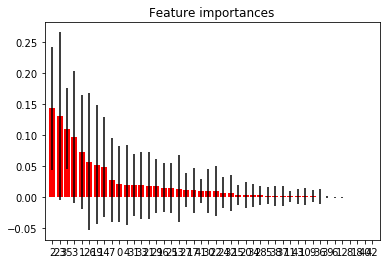

Wall time: 7min 1s


In [15]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from matplotlib import pyplot

names = train_x.columns

RFreg = RandomForestRegressor(max_depth=4, 
                              random_state=0,
                              criterion="mse",
                              n_jobs=3
                             )
RFreg.fit(train_x, train_y)

print("Features sorted by their score:")

print(sorted(zip(map(lambda train_x: round(train_x, 4), 
                     RFreg.feature_importances_), 
                 names), 
             reverse=True))
'''
'''
std = np.std([tree.feature_importances_ 
              for tree in RFreg.estimators_],
             axis=0)
importances = RFreg.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]),
        importances[indices],
        color="r",
        yerr=std[indices],
        align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [13]:
# drop non important features

# (0.0003, 'keyword'), 
# (0.0001, 'country'), 
# (0.0001, 'browser'), 
# (0.0, 'newVisits'), 
# (0.0, 'isTrueDirect'), 
# (0.0, 'isMobile'), 
# (0.0, 'googleAds')

train_xnew = train_x.drop(['keyword',
                          'country',
                          'browser',
                          'newVisits',
                          'isTrueDirect',
                          'isMobile',
                          'googleAds'],
                          axis=1)
print(train_xnew.columns)
print()

print(train_y.head())

train_ynew = train_y.drop(['keyword',
                          'country',
                          'browser',
                          'newVisits',
                          'isTrueDirect',
                          'isMobile',
                          'googleAds'],
                          axis=1)
print(train_ynew.columns)
print()

Index(['channelGrouping', 'first_ses_from_the_period_start',
       'last_ses_from_the_period_end', 'interval_dates',
       'visitStartTime_counts', 'visitNumber_max', 'operatingSystem',
       'deviceCategory', 'continent', 'subContinent', 'region', 'metro',
       'city', 'networkDomain', 'bounces_mean', 'hits_sum', 'hits_min',
       'hits_max', 'hits_mean', 'pageviews_sum', 'pageviews_min',
       'pageviews_max', 'pageviews_mean', 'sessionQualityDimMin',
       'sessionQualityDimMax', 'sessionQualityDimMean', 'sessionQualityDimSum',
       'timeOnSite_sum', 'timeOnSite_min', 'timeOnSite_max', 'timeOnSite_mean',
       'transactions', 'campaign', 'source', 'medium', 'referralPath',
       'customDimensions_value'],
      dtype='object')

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64


ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [10]:
RFreg = RandomForestRegressor(max_depth=4, 
                              random_state=0,
                              criterion="mse",
                              n_jobs=3
                             )
RFreg.fit(train_xnew, train_ynew)



NameError: name 'train_ynew' is not defined